In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn import utils

import numpy as np
#df = pd.read_csv('loan_data_train.csv', encoding='cp950')
for dirname, _, filenames in os.walk('loan'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

loan\loan_data_test.csv
loan\loan_data_train.csv


In [104]:
nRowsRead = 3000 # specify 'None' if want to read whole file
# loan_data_test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('loan/loan_data_train.csv', encoding='cp950', nrows = nRowsRead)
df2 = pd.read_csv('loan/loan_data_test.csv', encoding='cp950', nrows = nRowsRead)

In [125]:
def checkValue(result, origin, columns, columns_result):
    rank = []
    for i in range(len(result)):
        if ( abs(result[i] - origin[i]) <= 500 ): 
            rank.append('A')
        if ( abs(result[i] - origin[i]) <= 1000 & abs(result[i] - origin[i]) > 500 ): 
            rank.append('B')
        if ( abs(result[i] - origin[i]) <= 1500 & abs(result[i] - origin[i]) > 1000 ): 
            rank.append('C')
        if ( abs(result[i] - origin[i]) <= 2000 & abs(result[i] - origin[i]) > 1500 ): 
            rank.append('D')
        if ( abs(result[i] - origin[i]) > 2000):
            rank.append('F')
    printRank(rank, columns, columns_result)

In [126]:
def printRank(rank, columns, columns_result):
    rank_df = pd.DataFrame(rank, columns=["rank"])
    rank_length = []
    rank_length.append(len(rank_df.loc[ rank_df['rank'] == 'A']))
    rank_length.append(len(rank_df.loc[ rank_df['rank'] == 'B']))
    rank_length.append(len(rank_df.loc[ rank_df['rank'] == 'C']))
    rank_length.append(len(rank_df.loc[ rank_df['rank'] == 'D']))
    rank_length.append(len(rank_df.loc[ rank_df['rank'] == 'F']))
    column_text = ""
    for i in range(len(columns)):
        if((i + 1) == len(columns)):
            column_text += columns[i]
            break
        column_text += columns[i] + ", "
    print( '根據 ' + column_text + ' 預測' + columns_result + ' ')
    print( "rank A (誤差 500以下) 有 " + str(rank_length[0]) + "個") 
    print( "rank B (誤差 1000 ~ 500) 有 " + str(rank_length[1]) + "個") 
    print( "rank C (誤差 1500 ~ 1000) 有 " + str(rank_length[2]) + "個") 
    print( "rank D (誤差 2000 ~ 1500) 有 " + str(rank_length[3]) + "個") 
    print( "rank F (誤差 2000 以上) 有 " + str(rank_length[4]) + "個")
    ranked = ['A', 'B', 'C', 'D', 'F']
    plt.ylabel("count")          # 設定y軸標題 
    plt.xlabel("ranked")            # 設定x軸標題    
    plt.bar(ranked, rank_length)


In [127]:
columns_clear = ['客戶每月收入', '客戶要求的貸款金額', '銀行批准的客戶貸款金額', '信用平衡所有未清信貸額度的總債務餘額', '最後6個月客戶查詢的貸款數量','銀行為每個客戶確定的利率']
columns = ['銀行批准的客戶貸款金額', '客戶每月收入', '最後6個月客戶查詢的貸款數量']
columns_result = '銀行為每個客戶確定的利率'

In [128]:
#清除空白值及 "."
def data_present(column, df):
    df[column].replace('\n', 0.0, inplace=True)
    df[column].replace('.', 0.0, inplace=True)
    df[column].replace('nan', 0, inplace=True)
    df[column] = df[column].astype(str).str.replace('%', "")
    df[column] = df[column].fillna(df[column].median())
    #df[column].astype('float64')
    df[column] = pd.to_numeric(df[column])

In [129]:
for clear in columns_clear:
    data_present( clear, df2)
    data_present( clear, df)

In [130]:
train_data = df[columns]
train_label = df[columns_result].astype('float64')
test_data = df2[columns]
test_label = df2[columns_result].astype('float64')

#train_label = pd.to_numeric(df['由投資者提供的金額銀行批准的客戶貸款金額'], downcast='signed')
test_label = np.asarray( test_label.astype('int64'))

## knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_data,train_label)

In [137]:
train_la = train_label * 100

In [138]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_data,train_la.astype('int'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [139]:
result = knn.predict(test_data)

In [142]:
result / 100

array([ 7.14, 10.99, 12.12, 12.12,  7.9 ,  8.59, 14.33,  9.99,  6.03,
       17.27,  7.9 ,  7.9 , 10.16,  6.62,  8.9 ,  7.9 , 13.67,  6.03,
        8.9 ,  8.9 , 10.74, 16.29,  6.92,  8.49, 11.12,  5.99, 12.12,
       14.09, 12.12, 10.16,  6.03, 15.31,  9.76,  6.62,  6.62,  7.29,
        8.9 ,  6.62,  7.9 , 18.55,  6.62,  5.99, 13.11,  9.76,  6.03,
        9.76, 14.33,  7.62,  7.9 ,  5.79,  7.9 , 14.09, 17.77, 11.86,
       21.49,  6.54, 14.09, 14.09,  8.9 , 12.12, 13.11, 15.31,  9.99,
       18.75,  7.14,  6.03, 13.11, 14.33, 15.21,  7.29,  6.17, 11.71,
        7.9 ,  7.9 , 14.09,  6.03,  8.9 ,  6.03,  7.9 , 17.77,  7.9 ,
        8.9 ,  6.62,  5.42, 15.31,  5.79,  6.17, 16.82,  7.9 ,  8.9 ,
        7.9 , 10.16,  6.03, 21.49,  7.9 , 16.82,  5.79,  7.9 ,  9.91,
        6.62, 12.12,  7.9 ,  7.29,  8.59, 12.12, 10.16,  7.9 ,  9.32,
       12.12,  8.88,  7.9 ,  8.9 ,  5.99, 13.99, 17.27, 12.12, 13.11,
        6.54,  5.99,  6.03,  7.68, 12.12,  8.59,  5.42, 12.12,  6.62,
       11.14, 16.29,

根據 銀行批准的客戶貸款金額, 客戶每月收入, 最後6個月客戶查詢的貸款數量 預測銀行為每個客戶確定的利率 
rank A (誤差 500以下) 有 0個
rank B (誤差 1000 ~ 500) 有 2個
rank C (誤差 1500 ~ 1000) 有 1個
rank D (誤差 2000 ~ 1500) 有 0個
rank F (誤差 2000 以上) 有 4個


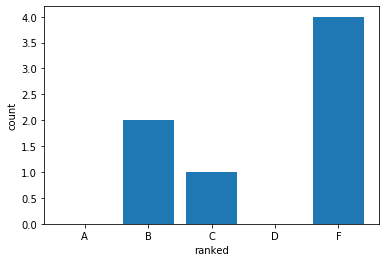

In [140]:
checkValue(result, test_label, columns, columns_result)

In [ ]:
df

In [ ]:
train_label

In [635]:
df['銀行批准的客戶貸款金額']

0         525.00
1         200.00
2        3100.00
3         275.00
4         917.28
          ...   
2195     9875.00
2196     6500.00
2197     8000.00
2198     8000.00
2199    16000.00
Name: 銀行批准的客戶貸款金額, Length: 2200, dtype: float64

### train_data = []
train_label = []

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(df['由投資者提供的金額銀行批准的客戶貸款金額'])

train_data = df[['客戶要求的貸款金額','信用平衡所有未清信貸額度的總債務餘額']]
train_label = df['由投資者提供的金額銀行批准的客戶貸款金額'].astype('int64')
test_data = df2[['客戶要求的貸款金額','信用平衡所有未清信貸額度的總債務餘額']]
test_label = df2['由投資者提供的金額銀行批准的客戶貸款金額']

knn.fit(train_data,train_label)
